In [1]:
from matplotlib.patches import Rectangle
import matplotlib.colors
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from qutip import *
import pickle
import matplotlib.transforms as mtransforms
from ShirleyFloquet import *
np.set_printoptions(suppress=True)

# Collision Angles
Loading the parameter sweepe results we computed on the cluster, we can now visualize the collision angles. 




In [2]:
#############################################
# Physical parameters
#############################################
order = 3
Ncut = 2*order  # Ncut >> 3k/2, where k is the order we want to reach
dimFourier = 2*Ncut+1
treshold = 0.2  # Treshold for level indentification
Eg = 1
Ee = 2
Ef = 3
omegad1bare = Ef-Eg
H0 = np.diag([Eg, Ee, Ef])
dimSpace = 3
delta = 0
factinf = 0.6
factmax = 1.8
Npoints = 1000
omegad1range = np.linspace(factinf*(Ef-Eg), factmax*(Ef-Eg), Npoints)
subspacedim = 66
epsilond1 = 0.1
epsilond2 = 0.1


#############################################
# Extract data
#############################################
collisionangles = np.zeros((Npoints, order+1, subspacedim), dtype=float)
Plot_spectrum = np.zeros((Npoints, order+1, subspacedim), dtype=bool)
Plot_spectrum_Color = np.zeros((Npoints, order+1, subspacedim), dtype=float)
Plot_spectrum_Floquet_Band = np.zeros(
    (Npoints, order+1, subspacedim), dtype=int)
omegad1range = np.zeros(Npoints)
spectrange = np.zeros((Npoints, subspacedim), dtype=float)

for simulationindex in range(Npoints):
    name = 'Data Example/Lambdasystem_OmegaSweepe_Range_0.5_1.8_delta=0_Simulation=' + \
        str(simulationindex)  
    with open(name+'.pickle', 'rb') as outp:
        Sweeperesults = pickle.load(outp)
    omegaind = Sweeperesults['omegaind']
    omegad1range[omegaind] = Sweeperesults['omegad1']
    collisionangles[omegaind, :, :] = Sweeperesults['collisionangles']
    Plot_spectrum[omegaind, :, :] = Sweeperesults['Plot_spectrum']
    Plot_spectrum_Color[omegaind, :, :] = Sweeperesults['Plot_spectrum_Color']
    spectrange[omegaind, :] = Sweeperesults['spectrange']
    Plot_spectrum_Floquet_Band[omegaind, :,
                               :] = Sweeperesults['Plot_spectrum_Floquet_Band']

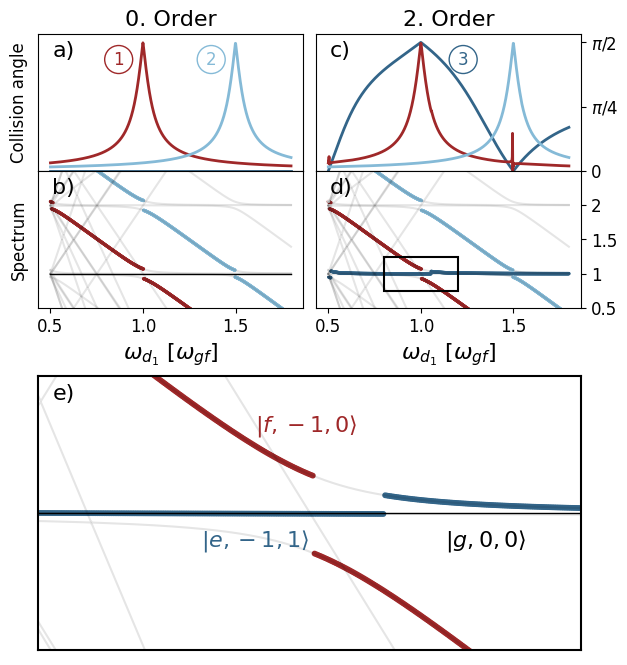

In [3]:
layout = [
    ["a)", "c)"],
    ["b)", "d)"],
    [".", "."],
    ["e)", "e)"],
    ["e)", "e)"]]
fig, axd = plt.subplot_mosaic(layout, figsize=(7, 8),  height_ratios=[1,1, 0.5, 1,1])#We insert an extra axis to control the spacing with plot e)
ymax = 2.5
ymin = 0.5
fs = 16
fstickslabels=fs-4
colors = np.array([(47/256, 72/256, 88/256), (51/256, 101/256, 138/256), (160/256, 40/256,
                                                                 41/256), (134/256, 187/256, 216/256), (151/256, 161/256, 105/256), (1, 1, 1)])
colormax = colors[1:]

# Plot only three maximal angles
Nmax = 3

##################################################################
###########################zeroth order###########################
##################################################################
Perturb_order = 0

colors = np.array(colors)
axd['a)'].set_xticks([])
axd['a)'].set_yticks([])
axd['a)'].set_ylabel(r"Collision angle", fontsize=fstickslabels)
axd['a)'].set_ylim([0, math.pi/2+0.1])
axd['b)'].set_xlabel(r"$\omega_{d_1}$ $[\omega_{gf}]$", fontsize=fs)
axd['b)'].tick_params(axis='both', which='major', labelsize=fstickslabels)
axd['b)'].set_ylim([ymin, ymax])
axd['b)'].set_yticks([]) 
axd['b)'].set_ylabel(r"Spectrum", fontsize=fstickslabels)

#########################################################
# Plot floquet energy bands from exact diagonalization
#########################################################
for j in range(len(spectrange[0])):
    axd['b)'].plot(omegad1range/omegad1bare, spectrange[:, j],
                   '-', color='black', alpha=0.1)
# Plot the band we are investigating
axd['b)'].plot(omegad1range/omegad1bare,
               np.ones(len(omegad1range)), linewidth=1, color='black')

##################################
# Get peaks
##################################
subspacedim = len(spectrange[0])
peaks = []
for inddd in range(subspacedim):
    peakstmp, hei = sp.signal.find_peaks(
        collisionangles[:, Perturb_order, inddd], distance=10, height=math.pi/2*0.9)
    peakstmp = list(peakstmp)
    peaks += peakstmp

###################################
# Plot the maximala collision angles
###################################
sortedanges = np.argsort(np.mean(collisionangles[:, 2, :], axis=0))[::-1]
for indj, j in enumerate(sortedanges[0:Nmax]):
    axd['a)'].plot(omegad1range/omegad1bare, collisionangles[:, Perturb_order,
                   j], '-', color=colormax[indj], linewidth=2, markersize=1.5)

#######################################
# Color the Floquet bands which have a
# large overlap with the colliding
# non perturbed states
#######################################
for band, plot_ in enumerate(Plot_spectrum[:, Perturb_order, :].T):
    C = Plot_spectrum_Floquet_Band[plot_, Perturb_order, band]
    for enum, Fband in enumerate(sortedanges[:Nmax]):
        C[C == Fband] = enum
    C[C > np.abs(len(sortedanges[:Nmax]))] = -1
    C = np.array(colormax[C], dtype=tuple)
    spectband = spectrange[:, band]
    axd['b)'].scatter(omegad1range[plot_]/omegad1bare,
                      spectband[plot_], color=C, s=2)

##################################################################
###########################Second order###########################
##################################################################
Perturb_order = 2
axd['c)'].set_xticks([])
axd['c)'].set_yticks([0, math.pi/4, math.pi/2],
                     [r'0', r'$\pi/4$', r'$\pi/2$'], fontsize=fstickslabels)
axd['c)'].yaxis.tick_right()
axd['c)'].set_ylim([0, math.pi/2+0.1])
axd['d)'].set_xlabel(r"$\omega_{d_1}$ $[\omega_{gf}]$", fontsize=fs)
axd['d)'].tick_params(axis='both', which='major', labelsize=fstickslabels)
axd['d)'].set_ylim([ymin, ymax])
axd['d)'].set_yticks([0.5, 1, 1.5, 2], ['0.5', '1', '1.5', '2'], fontsize=fstickslabels)
axd['d)'].yaxis.tick_right()
#########################################################
# Plot floquet energy bands from exact diagonalization
#########################################################
for j in range(len(spectrange[0])):
    axd['d)'].plot(omegad1range/omegad1bare, spectrange[:, j],
                   '-', color='black', alpha=0.1)

##################################
# Get peaks
##################################
subspacedim = len(spectrange[0])
peaks = []
for inddd in range(subspacedim):
    peakstmp, hei = sp.signal.find_peaks(
        collisionangles[:, Perturb_order, inddd], distance=10, height=math.pi/2*0.9)
    peakstmp = list(peakstmp)
    peaks += peakstmp

###################################
# Plot the maximala collision angles
###################################
sortedanges = np.argsort(np.mean(collisionangles[:, 2, :], axis=0))[::-1]
for indj, j in enumerate(sortedanges[0:Nmax]):
    axd['c)'].plot(omegad1range/omegad1bare, collisionangles[:, Perturb_order,
                   j], '-', color=colormax[indj], linewidth=2, markersize=1.5)

#######################################
# Color the Floquet bands which have a
# large overlap with the colliding
# non perturbed states
#######################################
for band, plot_ in enumerate(Plot_spectrum[:, Perturb_order, :].T):
    C = Plot_spectrum_Floquet_Band[plot_, Perturb_order, band]
    for enum, Fband in enumerate(sortedanges[:Nmax]):
        C[C == Fband] = enum
    C[C > np.abs(len(sortedanges[:Nmax]))] = -1
    C = np.array(colormax[C], dtype=tuple)
    spectband = spectrange[:, band]
    axd['d)'].scatter(omegad1range[plot_]/omegad1bare,
                      spectband[plot_], color=C, s=2)


###########################################################################
###########################Second order Close up###########################
###########################################################################
xzoommin = 0.8
xzoommax = 1.2
yzoommin = 0.75
yzoommax = 1.25

axd['e)'].set_yticks([])
axd['e)'].set_xticks([])
axd['e)'].yaxis.tick_right()
axd['e)'].set_ylim([yzoommin, yzoommax])
axd['e)'].set_xlim([xzoommin, xzoommax])

for j in range(len(spectrange[0])):
    axd['e)'].plot(omegad1range/omegad1bare, spectrange[:, j],
                   '-', color='black', alpha=0.1)

# Plot the band we are investigating
axd['e)'].plot(omegad1range/omegad1bare,
               np.ones(len(omegad1range)), linewidth=1, color='black')


for band, plot_ in enumerate(Plot_spectrum[:, Perturb_order, :].T):
    C = Plot_spectrum_Floquet_Band[plot_, Perturb_order, band]
    for enum, Fband in enumerate(sortedanges[:Nmax]):
        C[C == Fband] = enum
    C[C > np.abs(len(sortedanges[:Nmax]))] = -1
    C = np.array(colormax[C], dtype=tuple)
    spectband = spectrange[:, band]
    axd['e)'].scatter(omegad1range[plot_]/omegad1bare,
                      spectband[plot_], color=C, s=10)


axd['d)'].add_patch(Rectangle((xzoommin, yzoommin), (xzoommax-xzoommin),
                    (yzoommax-yzoommin), edgecolor="black", fill=False, linewidth=1.5))

axd['e)'].spines['left'].set_linewidth(1.5)
axd['e)'].spines['bottom'].set_linewidth(1.5)
axd['e)'].spines['right'].set_linewidth(1.5)
axd['e)'].spines['top'].set_linewidth(1.5)

###########################################################################
################################Annotate ################################
###########################################################################

axd['a)'].text(0.84, 1.3, r"1", fontsize=fstickslabels,color=colormax[1],bbox=dict(boxstyle="circle", facecolor='none',edgecolor=colormax[1]))
axd['a)'].text(1.34, 1.3, r"2", fontsize=fstickslabels,color=colormax[2],bbox=dict(boxstyle="circle", facecolor='none',edgecolor=colormax[2]))
axd['c)'].text(1.2, 1.3, r"3", fontsize=fstickslabels,color=colormax[0],bbox=dict(boxstyle="circle", facecolor='none',edgecolor=colormax[0]))
axd['e)'].text(1.1, 0.94, r"$|g,0,0\rangle$", fontsize=fs)
axd['e)'].text(0.92, 0.94, r"$|e,-1,1\rangle$",color=colormax[0], fontsize=fs)
axd['e)'].text(0.96, 1.15, r"$|f,-1,0\rangle$",color=colormax[1], fontsize=fs)
axd['a)'].set_title("0. Order",fontsize=fs)
axd['c)'].set_title("2. Order",fontsize=fs)

###########################################################################
################################Save figure################################
###########################################################################
fig.subplots_adjust(wspace=0.05, hspace=0)

# Add numbering to figure
for label, ax in axd.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0, 1, label, transform=ax.transAxes + trans,
            fontsize=fs, verticalalignment='top', fontfamily='sans-serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))
